In [1]:
text = "Tokenizing Text is a core task of NLP."
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 'T', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [2]:
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}

In [3]:
token2idx

{' ': 0,
 '.': 1,
 'L': 2,
 'N': 3,
 'P': 4,
 'T': 5,
 'a': 6,
 'c': 7,
 'e': 8,
 'f': 9,
 'g': 10,
 'i': 11,
 'k': 12,
 'n': 13,
 'o': 14,
 'r': 15,
 's': 16,
 't': 17,
 'x': 18,
 'z': 19}

In [4]:
input_ids = [token2idx[token] for token in tokenized_text]

In [5]:
input_ids

[5,
 14,
 12,
 8,
 13,
 11,
 19,
 11,
 13,
 10,
 0,
 5,
 8,
 18,
 17,
 0,
 11,
 16,
 0,
 6,
 0,
 7,
 14,
 15,
 8,
 0,
 17,
 6,
 16,
 12,
 0,
 14,
 9,
 0,
 3,
 2,
 4,
 1]

In [6]:
import pandas as pd
categorical_df = pd.DataFrame(
    {
        "Name": ["Bumblebee", "Optimus Prime", "Megatron"],
        "Label ID": [0, 1, 2]
    }
)

In [7]:
categorical_df.head()

,Name,Label ID
0,Bumblebee,0
1,Optimus Prime,1
2,Megatron,2


In [8]:
pd.get_dummies(categorical_df["Name"])

,Bumblebee,Megatron,Optimus Prime
0,1,0,0
1,0,0,1
2,0,1,0


In [9]:
import torch
import torch.nn.functional as F

input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([38, 20])

In [10]:
print("token", tokenized_text[0])
print("텐서 인덱스", input_ids[0])
print("원핫표현", one_hot_encodings[0])

token T
텐서 인덱스 tensor(5)
원핫표현 tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [11]:
#2.2.2 단어 토큰화

tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'Text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


In [12]:
# subword tokenization
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [13]:
from transformers import DistilBertTokenizer

distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

In [14]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [15]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)

In [16]:
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


In [17]:
# 처음과 끝에 "CLS", "SEP 토큰이 추가.
# 문자앞의 #은 앞문자열이 공백이 아님을 뜻함.
print(tokenizer.convert_tokens_to_string(tokens)) # 다시 합치는 메서드

[CLS] tokenizing text is a core task of nlp. [SEP]


In [18]:
tokenizer.vocab_size

30522

In [19]:
tokenizer.model_max_length

512

In [20]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [21]:
# 2.2.4 전체 데이터셋의 토큰화

def tokenize(batch):
  return tokenizer(batch["text"], padding=True, truncation=True)
  # padding -> 긴 샘플 크기에 맞추어 패딩
  # truncation -> 모델의 최대 문맥 크기에 맞추어 샘플을 잘라냄.

In [22]:
!pip install datasets
from datasets import load_dataset
emotions = load_dataset("emotion")

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [23]:
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


- attention mask: 입력에서 패딩처리된 부분을 무시함.
- 특수토큰 idx: [PAD]: 0, [UNK]: 100, [CLS]:101, [SEP]: 102, [MASK]: 103

In [24]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)
print(emotions_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


In [25]:
from transformers import AutoModel
import torch

In [26]:
model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

In [27]:
# 마지막 은닉상태의 추출

text = "this is a test"
inputs = tokenizer(text, return_tensors="pt")
# return tentors -> 텐서를 반환.
print(f"입력 텐서 크기: {inputs['input_ids'].size()}")

입력 텐서 크기: torch.Size([1, 6])


In [28]:
print(inputs)

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}


In [29]:
inputs = {
    k:v.to(device) for k, v in inputs.items()
}
with torch.no_grad():
  outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [30]:
outputs.last_hidden_state.size() # batch_size, n_tokens, hidden_dim

torch.Size([1, 6, 768])

In [31]:
outputs.last_hidden_state[:,0].size() # 문자열의 마지막 hidden_state (양방향이라서 이거 쓰는 듯? 아직은 잘모르겠음..)

torch.Size([1, 768])

In [32]:
def extract_hidden_states(batch):
  inputs = {
      k:v.to(device) for k, v in batch.items()
      if k in tokenizer.model_input_names
  }
  with torch.no_grad():
    last_hidden_state = model(**inputs).last_hidden_state
  return{
      "hidden_state": last_hidden_state[:,0].cpu().numpy()
  }

In [33]:
emotions_encoded.set_format("torch",
                           columns=["input_ids", "attention_mask", "label"])
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True) # batch_size = 1000 *default value

In [34]:
emotions_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [35]:
import numpy as np

X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
print(X_train.shape)
print(X_valid.shape)

(16000, 768)
(2000, 768)


In [37]:
#!pip install umap-learn
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

X_scaled = MinMaxScaler().fit_transform(X_train)
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)

In [38]:
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])

In [39]:
df_emb["label"] = y_train
df_emb.head()

,X,Y,label
0,4.291312,6.127051,0
1,-2.979872,4.856811,0
2,5.313110,2.744461,3
3,-2.123249,2.757898,2
4,-3.319794,2.970660,3


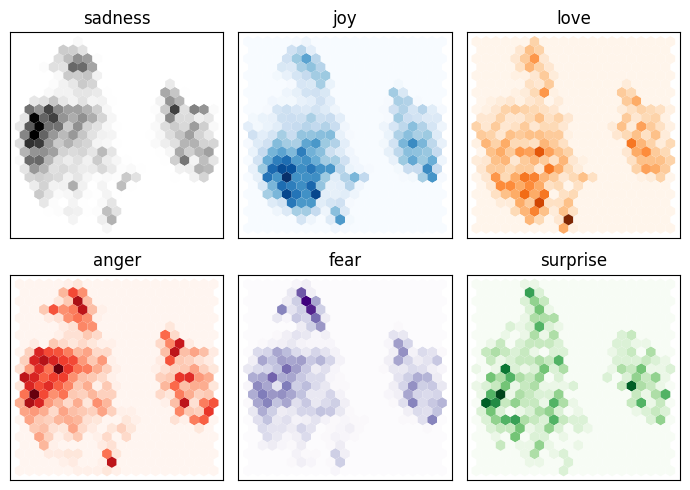

In [41]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(7, 5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions["train"].features["label"].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
  df_emb_sub = df_emb.query(f"label == {i}")
  axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
                 gridsize=20, linewidths=(0,))
  axes[i].set_title(label)
  axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

In [42]:
#sklearn의 회귀 모델을 이용한 분류
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.634

In [44]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

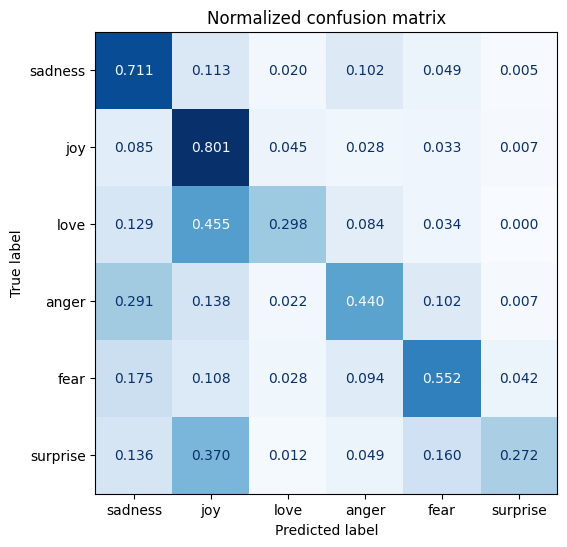

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
  cm = confusion_matrix(y_true, y_preds, normalize="true") # normalize => 확률로 바꾸어 출력
  fig, ax = plt.subplots(figsize=(6, 6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(cmap="Blues", ax=ax, colorbar=False, values_format=".3f")
  plt.title("Normalized confusion matrix")
  plt.show()

y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

In [ ]:
"""처리과정 요약

#함수들

def tokenize(batch):
  return tokenizer(batch["text"], padding=True, truncation=True)

def extract_hidden_states(batch):
  inputs = {
      k:v.to(device) for k, v in batch.items()
      if k in tokenizer.model_input_names
  }
  with torch.no_grad():
    last_hidden_state = model(**inputs).last_hidden_state
  return{
      "hidden_state": last_hidden_state[:,0].cpu.numpy()
  }

#실제코드 파이프라인

from datasets import load_dataset
from tranformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

emotions = load_dataset("emotion")

emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)
emotions_encoded.set_format("torch",
                           columns=["input_ids", "attention_mask", "label"])

emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True) # batch_size = 1000 *default value


"""